In [310]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

import warnings
warnings.filterwarnings('ignore')

In [311]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.utils import resample

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.model_selection import KFold, GridSearchCV, cross_validate

In [312]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot, graphviz


In [313]:
df = pd.read_csv('Master_DF.csv')
df.head()

Application ID  Age Gender Marital Status (at the time of application)  \
0       954457215   48      F                                     Married   
1       432830445   31      M                                     Married   
2       941387308   32      M                                      Single   
3       392161677   43      M                                     Married   
4       182011211   35      F                                     Married   

   No of dependents  Income     Education Profession Type of residence  \
0               2.0    40.0      Bachelor        SAL            Rented   
1               4.0    55.0  Professional    SE_PROF            Rented   
2               2.0    46.0      Bachelor    SE_PROF            Rented   
3               1.0    53.0      Bachelor         SE            Rented   
4               5.0    44.0  Professional        SAL            Rented   

   No of months in current residence  ...  \
0                                113  ...   
1                                112  ...   
2                                104  ...   
3                                 94  ...   
4                                112  ...   

   No of trades opened in last 12 months  \
0                                      2   
1                                      2   
2                                      0   
3                                      1   
4                                      1   

   No of PL trades opened in last 6 months  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   No of PL trades opened in last 12 months  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   No of Inquiries in last 6 months (excluding home & auto loans)  \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  0                

   No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                                  0                 
1                                                  0                 
2                                                  0                 
3                                                  0                 
4                                                  0                 

   Presence of open home loan  Outstanding Balance  Total No of Trades  \
0                         1.0            2999395.0                   4   
1                         0.0               3078.0                   5   
2                         1.0            3004972.0                   2   
3                         1.0            3355373.0                   4   
4                         1.0            3014283.0                   4   

   Presence of open auto loan  Performance Tag  
0                           0              0.0  
1                           0              0.0  
2                           0              0.0  
3                           1              0.0  
4                           0              0.0  

[5 rows x 29 columns]

In [314]:
df.shape

(68536, 29)

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68536 entries, 0 to 68535
Data columns (total 29 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Application ID                                                   68536 non-null  int64  
 1   Age                                                              68536 non-null  int64  
 2   Gender                                                           68536 non-null  object 
 3   Marital Status (at the time of application)                      68536 non-null  object 
 4   No of dependents                                                 68536 non-null  float64
 5   Income                                                           68536 non-null  float64
 6   Education                                                        68536 non-null  object 
 7   Profession                              

In [316]:
df.isnull().sum()

Application ID                                                     0
Age                                                                0
Gender                                                             0
Marital Status (at the time of application)                        0
No of dependents                                                   0
Income                                                             0
Education                                                          0
Profession                                                         0
Type of residence                                                  0
No of months in current residence                                  0
No of months in current company                                    0
No of times 90 DPD or worse in last 6 months                       0
No of times 60 DPD or worse in last 6 months                       0
No of times 30 DPD or worse in last 6 months                       0
No of times 90 DPD or worse in las

In [317]:
df_cat = df.select_dtypes(include='object')
df_cat.columns

Index(['Gender', 'Marital Status (at the time of application)', 'Education',
       'Profession', 'Type of residence'],
      dtype='object')

In [318]:
df_cat.head()

Gender Marital Status (at the time of application)     Education Profession  \
0      F                                     Married      Bachelor        SAL   
1      M                                     Married  Professional    SE_PROF   
2      M                                      Single      Bachelor    SE_PROF   
3      M                                     Married      Bachelor         SE   
4      F                                     Married  Professional        SAL   

  Type of residence  
0            Rented  
1            Rented  
2            Rented  
3            Rented  
4            Rented

In [319]:
le = preprocessing.LabelEncoder()
df_cat = df_cat.apply(le.fit_transform)
df_cat.head()

Gender  Marital Status (at the time of application)  Education  Profession  \
0       0                                            0          0           0   
1       1                                            0          4           2   
2       1                                            1          0           2   
3       1                                            0          0           1   
4       0                                            0          4           0   

   Type of residence  
0                  4  
1                  4  
2                  4  
3                  4  
4                  4

In [320]:
df = df.drop(df_cat.columns, axis=1)
df = pd.concat([df, df_cat], axis=1)
df.head()

Application ID  Age  No of dependents  Income  \
0       954457215   48               2.0    40.0   
1       432830445   31               4.0    55.0   
2       941387308   32               2.0    46.0   
3       392161677   43               1.0    53.0   
4       182011211   35               5.0    44.0   

   No of months in current residence  No of months in current company  \
0                                113                               56   
1                                112                               46   
2                                104                               49   
3                                 94                               53   
4                                112                               43   

   No of times 90 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 60 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 30 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 90 DPD or worse in last 12 months  ...  \
0                                              0  ...   
1                                              0  ...   
2                                              0  ...   
3                                              0  ...   
4                                              0  ...   

   Presence of open home loan  Outstanding Balance  Total No of Trades  \
0                         1.0            2999395.0                   4   
1                         0.0               3078.0                   5   
2                         1.0            3004972.0                   2   
3                         1.0            3355373.0                   4   
4                         1.0            3014283.0                   4   

   Presence of open auto loan  Performance Tag  Gender  \
0                           0              0.0       0   
1                           0              0.0       1   
2                           0              0.0       1   
3                           1              0.0       1   
4                           0              0.0       0   

   Marital Status (at the time of application)  Education  Profession  \
0                                            0          0           0   
1                                            0          4           2   
2                                            1          0           2   
3                                            0          0           1   
4                                            0          4           0   

   Type of residence  
0                  4  
1                  4  
2                  4  
3                  4  
4                  4  

[5 rows x 29 columns]

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68536 entries, 0 to 68535
Data columns (total 29 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Application ID                                                   68536 non-null  int64  
 1   Age                                                              68536 non-null  int64  
 2   No of dependents                                                 68536 non-null  float64
 3   Income                                                           68536 non-null  float64
 4   No of months in current residence                                68536 non-null  int64  
 5   No of months in current company                                  68536 non-null  int64  
 6   No of times 90 DPD or worse in last 6 months                     68536 non-null  int64  
 7   No of times 60 DPD or worse in last 6 mo

In [322]:
df['Performance Tag'].dtype

dtype('float64')

In [323]:
df['Performance Tag'] = df['Performance Tag'].astype('category')

In [324]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=100)

In [325]:
df_train.shape

(54828, 29)

In [326]:
df_test.shape

(13708, 29)

In [327]:
df_train['Performance Tag'].value_counts()

0.0    52533
1.0     2295
Name: Performance Tag, dtype: int64

In [328]:
df_train = df_train.drop('Application ID', 1)

In [329]:
y_train = df_train['Performance Tag']
X_train = df_train.loc[:, ~df_train.columns.isin(['Performance Tag'])]

In [330]:
y_test = df_test['Performance Tag']
X_test = df_test.loc[:, ~df_test.columns.isin(['Performance Tag'])]

In [331]:
dt_default = DecisionTreeClassifier(max_depth=5)

In [332]:
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [333]:
y_pred_default = dt_default.predict(X_test[X_train.columns])

In [334]:
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     13112
         1.0       0.00      0.00      0.00       596

    accuracy                           0.96     13708
   macro avg       0.48      0.50      0.49     13708
weighted avg       0.91      0.96      0.94     13708



In [335]:
print(confusion_matrix(y_test, y_pred_default))

[[13109     3]
 [  596     0]]


In [336]:
print(accuracy_score(y_test, y_pred_default))

0.9563028888240444


In [337]:
# Imbalanced Data. Have to upsample data

In [338]:
df_train['Performance Tag'].value_counts()

0.0    52533
1.0     2295
Name: Performance Tag, dtype: int64

In [339]:
df_train_0 = df_train[df_train['Performance Tag'] == 0]
df_train_1 = df_train[df_train['Performance Tag'] == 1]

In [340]:
df_train_1_up = resample(df_train_1, n_samples=len(df_train_0), replace=True, random_state=100)

In [341]:
df_train_1_up.shape

(52533, 28)

In [342]:
df_train_up = pd.concat([df_train_0, df_train_1_up])

In [343]:
df_train_up.shape

(105066, 28)

In [344]:
y_train = df_train_up['Performance Tag']
X_train = df_train_up.loc[:, ~df_train_up.columns.isin(['Performance Tag'])]

In [345]:
X_train.shape

(105066, 27)

In [346]:
X_train.columns

Index(['Age', 'No of dependents', 'Income',
       'No of months in current residence', 'No of months in current company',
       'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presence of open home loan', 'Outstanding Balance',
       'Total No of Trades', 'Presence of open auto loan', 'Gender',
       'Marital Status 

In [347]:
dt_1 = DecisionTreeClassifier(max_depth=5)

In [348]:
dt_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [349]:
y_pred_1 = dt_1.predict(X_test[X_train.columns])


In [350]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

         0.0       0.98      0.53      0.69     13112
         1.0       0.07      0.72      0.12       596

    accuracy                           0.54     13708
   macro avg       0.52      0.63      0.40     13708
weighted avg       0.94      0.54      0.66     13708



In [351]:
confusion_matrix(y_test, y_pred_1)

array([[6937, 6175],
       [ 165,  431]], dtype=int64)

In [352]:
accuracy_score(y_test, y_pred_1)

0.5374963524948935

In [353]:
f1_score(y_train, dt_1.predict(X_train))

0.6844187201397331

In [354]:
f1_score(y_test, y_pred_1)

0.11968897528464315

In [355]:
features = list(X_train.columns)


In [356]:
# Specifing path for dot file.
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

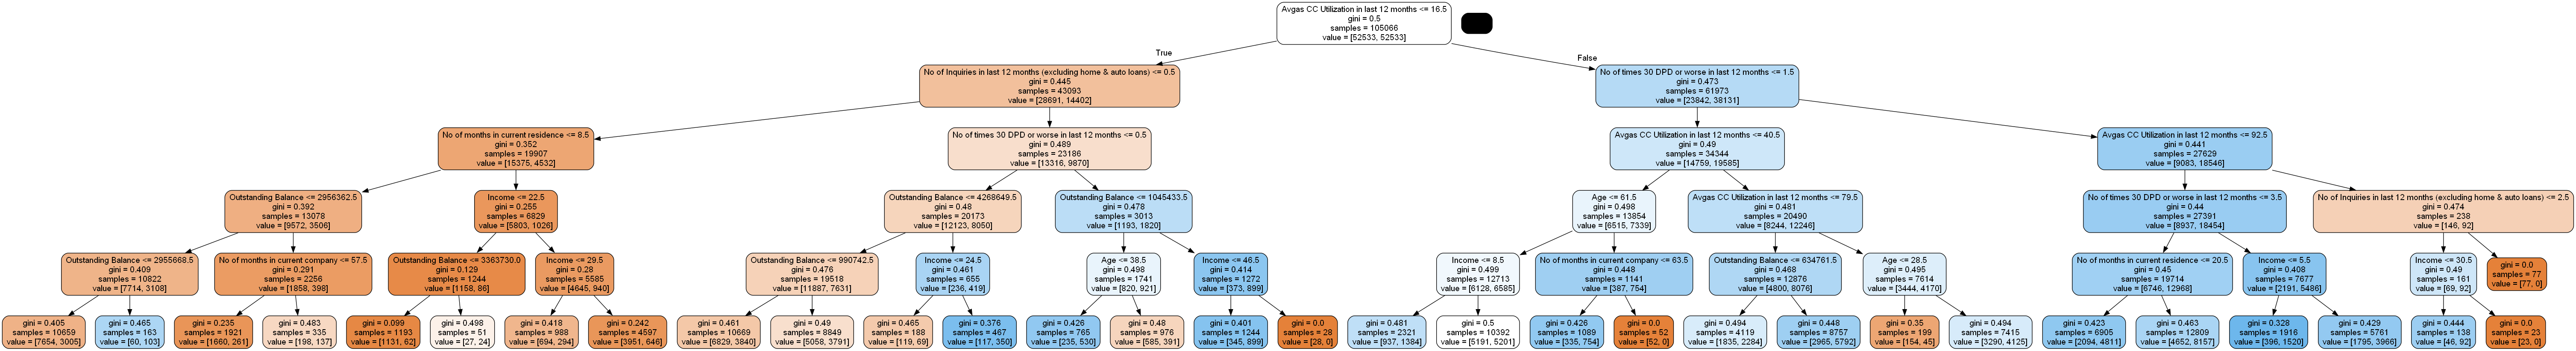

In [357]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_1, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [358]:
# scoring = {'accuracy': make_scorer(accuracy_score),
#            'precision': make_scorer(precision_score, average = 'macro'),
#            'recall': make_scorer(recall_score, average = 'macro'),
#            'f1': make_scorer(f1_score, average = 'macro')}

In [359]:
scorer = make_scorer(f1_score, average='macro')

In [360]:
n_folds =2

parameters = {'max_depth': range(5,60,10)}

dtree = DecisionTreeClassifier(criterion='gini', 
                               random_state=100)

tree = GridSearchCV(dtree, parameters,
                        cv = n_folds,
                        scoring =  scorer,
                        return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(5, 60, 10)},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=macro))

In [361]:
scores = tree.cv_results_
pd.DataFrame(scores).sort_values('rank_test_score').head()
#pd.DataFrame(scores)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
4       0.640288      0.003989         0.047390        0.000515   
5       0.690141      0.044892         0.049899        0.001000   
3       0.637298      0.004024         0.048470        0.000397   
2       0.617837      0.002478         0.047418        0.001452   
1       0.649758      0.140128         0.092254        0.045378   

  param_max_depth             params  split0_test_score  split1_test_score  \
4              45  {'max_depth': 45}           0.961032           0.959980   
5              55  {'max_depth': 55}           0.961032           0.959980   
3              35  {'max_depth': 35}           0.960344           0.958373   
2              25  {'max_depth': 25}           0.946971           0.939062   
1              15  {'max_depth': 15}           0.817911           0.821623   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
4         0.960506        0.000526                1            1.000000   
5         0.960506        0.000526                1            1.000000   
3         0.959358        0.000985                3            0.999524   
2         0.943016        0.003954                4            0.984139   
1         0.819767        0.001856                5            0.841471   

   split1_train_score  mean_train_score  std_train_score  
4            1.000000          1.000000         0.000000  
5            1.000000          1.000000         0.000000  
3            0.998249          0.998886         0.000638  
2            0.974118          0.979128         0.005011  
1            0.846067          0.843769         0.002298

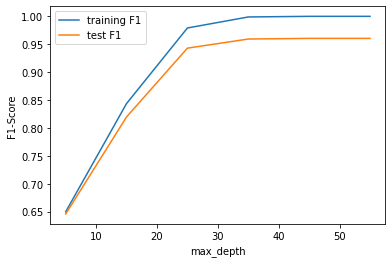

In [362]:
# plotting F1-scores with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training F1")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test F1")
plt.xlabel("max_depth")
plt.ylabel("F1-Score")
plt.legend()
plt.show()


In [363]:
# Tuning min_samples_leaf

n_folds = 5

parameters = {'min_samples_leaf': range(5,100,20)}

dtree = DecisionTreeClassifier(criterion='gini', random_state=100)

tree = GridSearchCV(dtree, parameters,
                    cv=n_folds,
                    scoring=scorer,
                    return_train_score=True)

tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 100, 20)},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=macro))

In [364]:
scores = tree.cv_results_
pd.DataFrame(scores).sort_values('rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.089221      0.179048         0.033124        0.020152   
1       0.894141      0.022764         0.020905        0.002081   
2       0.840952      0.008815         0.019191        0.001044   
3       0.800857      0.016905         0.019747        0.000755   
4       0.771135      0.012348         0.020140        0.001935   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.957715   
1                     25  {'min_samples_leaf': 25}           0.858468   
2                     45  {'min_samples_leaf': 45}           0.815354   
3                     65  {'min_samples_leaf': 65}           0.783103   
4                     85  {'min_samples_leaf': 85}           0.755379   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.957043           0.956233           0.958669  ...   
1           0.859431           0.855020           0.851219  ...   
2           0.809432           0.819041           0.810982  ...   
3           0.777651           0.781253           0.781375  ...   
4           0.757751           0.759940           0.759380  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.957331        0.000817                1            0.983946   
1         0.855950        0.002892                2            0.886617   
2         0.814127        0.003478                3            0.837933   
3         0.781986        0.002890                4            0.804626   
4         0.757643        0.001841                5            0.776669   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.984589            0.983863            0.984256   
1            0.887070            0.885894            0.882272   
2            0.833352            0.841677            0.831666   
3            0.800172            0.805707            0.799643   
4            0.776888            0.779782            0.778501   

   split4_train_score  mean_train_score  std_train_score  
0            0.983554          0.984042         0.000354  
1            0.884372          0.885245         0.001745  
2            0.833000          0.835526         0.003732  
3            0.804085          0.802847         0.002462  
4            0.777562          0.777880         0.001145  

[5 rows x 21 columns]

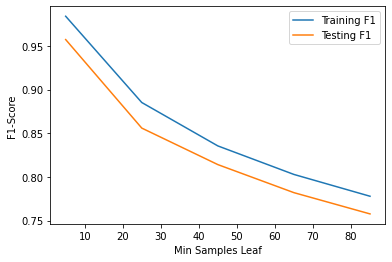

In [365]:
plt.figure()

plt.plot(scores['param_min_samples_leaf'],
          scores['mean_train_score'],
         label = 'Training F1')

plt.plot(scores['param_min_samples_leaf'],
         scores['mean_test_score'],
         label = 'Testing F1')

plt.legend()
plt.xlabel('Min Samples Leaf')
plt.ylabel('F1-Score')

plt.show()

In [366]:
from sklearn.model_selection import KFold, GridSearchCV

n_folds = 5

parameters = {'min_samples_split': range(5,200,20)}

dtree = DecisionTreeClassifier(criterion='gini', random_state=100)

tree = GridSearchCV(dtree, parameters,
                    cv=n_folds, 
                    scoring=scorer,
                    return_train_score=True)

tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=macro))

In [367]:
scores = tree.cv_results_
pd.DataFrame(scores).sort_values('rank_test_score').head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.119405      0.097849         0.028729        0.015580   
1       1.093920      0.096106         0.022526        0.001031   
2       1.030819      0.016818         0.020938        0.001086   
3       1.020274      0.015273         0.020542        0.000784   
4       1.019853      0.011244         0.021355        0.000806   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}           0.973952   
1                      25  {'min_samples_split': 25}           0.966370   
2                      45  {'min_samples_split': 45}           0.945877   
3                      65  {'min_samples_split': 65}           0.918583   
4                      85  {'min_samples_split': 85}           0.899355   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.972520           0.974905           0.974714  ...   
1           0.965552           0.964889           0.967703  ...   
2           0.943447           0.943158           0.947244  ...   
3           0.920712           0.922677           0.921571  ...   
4           0.897421           0.905218           0.898820  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.973589        0.001207                1            1.000000   
1         0.965479        0.001602                2            0.991921   
2         0.944775        0.001554                3            0.970441   
3         0.921591        0.001947                4            0.945684   
4         0.901184        0.003310                5            0.924486   

   split1_train_score  split2_train_score  split3_train_score  \
0            1.000000            1.000000            1.000000   
1            0.992397            0.990981            0.991433   
2            0.969620            0.968643            0.969603   
3            0.946904            0.948229            0.943257   
4            0.922733            0.930421            0.920858   

   split4_train_score  mean_train_score  std_train_score  
0            1.000000          1.000000         0.000000  
1            0.990612          0.991469         0.000639  
2            0.970286          0.969719         0.000636  
3            0.947437          0.946302         0.001733  
4            0.929156          0.925531         0.003683  

[5 rows x 21 columns]

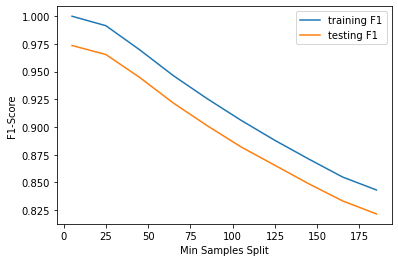

In [368]:
plt.figure()

plt.plot(scores['param_min_samples_split'],
         scores['mean_train_score'],
         label="training F1")

plt.plot(scores['param_min_samples_split'],
         scores['mean_test_score'],
         label="testing F1")

plt.xlabel('Min Samples Split')
plt.ylabel('F1-Score')
plt.legend()

plt.show()

In [369]:
param_grid = {'max_depth' : range(40,61,10),
              'min_samples_leaf' : range(5,16,10),
              'min_samples_split' : range(5,16,10),
              'criterion': ['Gini', 'entropy']}

n_folds = 5

dtree = DecisionTreeClassifier(random_state=100)

grid_search = GridSearchCV(dtree, param_grid=param_grid,
                    cv=n_folds, 
                    verbose=1,
                    scoring=scorer,
                    return_train_score=True)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'criterion': ['Gini', 'entropy'],
                         'max_depth': range(40, 61, 10),
                         'min_samples_leaf': range(5, 16, 10),
                         'min_samples_split': range(5, 16, 10)},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [370]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.sort_values('rank_test_score').head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
20       1.110759      0.023294         0.021316        0.000715   
16       1.285696      0.133718         0.021613        0.003665   
12       1.144931      0.068475         0.020938        0.000877   
21       1.110206      0.015653         0.020738        0.000753   
17       1.304895      0.112803         0.021536        0.002240   

   param_criterion param_max_depth param_min_samples_leaf  \
20         entropy              60                      5   
16         entropy              50                      5   
12         entropy              40                      5   
21         entropy              60                      5   
17         entropy              50                      5   

   param_min_samples_split                                             params  \
20                       5  {'criterion': 'entropy', 'max_depth': 60, 'min...   
16                       5  {'criterion': 'entropy', 'max_depth': 50, 'min...   
12                       5  {'criterion': 'entropy', 'max_depth': 40, 'min...   
21                      15  {'criterion': 'entropy', 'max_depth': 60, 'min...   
17                      15  {'criterion': 'entropy', 'max_depth': 50, 'min...   

    split0_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
20           0.959006  ...         0.959674        0.001461                1   
16           0.959006  ...         0.959674        0.001461                1   
12           0.959006  ...         0.959674        0.001461                1   
21           0.958958  ...         0.959656        0.001394                4   
17           0.958958  ...         0.959656        0.001394                4   

    split0_train_score  split1_train_score  split2_train_score  \
20            0.986470            0.987042            0.987815   
16            0.986470            0.987042            0.987815   
12            0.986470            0.987042            0.987815   
21            0.986446            0.987161            0.987506   
17            0.986446            0.987161            0.987506   

    split3_train_score  split4_train_score  mean_train_score  std_train_score  
20            0.986494            0.987018          0.986968         0.000490  
16            0.986494            0.987018          0.986968         0.000490  
12            0.986494            0.987018          0.986968         0.000490  
21            0.986470            0.987185          0.986954         0.000422  
17            0.986470            0.987185          0.986954         0.000422  

[5 rows x 24 columns]

In [371]:
cv_results.loc[0:3, 'params'][0]

{'criterion': 'Gini',
 'max_depth': 40,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [372]:
grid_search.best_score_

0.9596739886256429

In [373]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=40, min_samples_leaf=5,
                       min_samples_split=5, random_state=100)

In [374]:
clf_entropy = DecisionTreeClassifier(criterion='entropy',
                                     max_depth=40,
                                     min_samples_leaf=5,
                                     min_samples_split=5,
                                     random_state=100)

clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=40, min_samples_leaf=5,
                       min_samples_split=5, random_state=100)

In [375]:
clf_entropy.score(X_test[X_train.columns], y_test)

0.8978698570177999

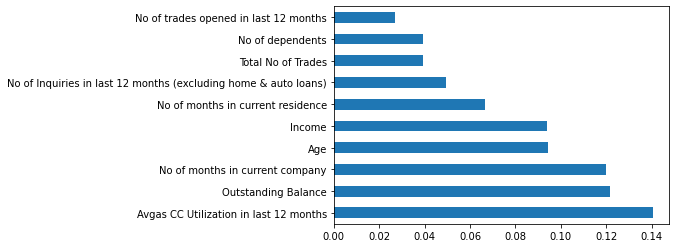

In [376]:
feat_importances = pd.Series(clf_entropy.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [377]:
fpr, tpr, thresh = metrics.roc_curve(y_test, clf_entropy.predict(X_test[X_train.columns]))

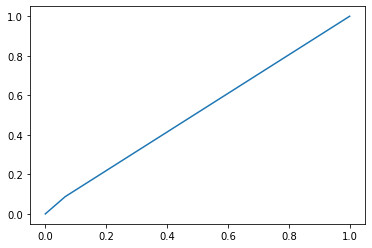

In [378]:
plt.plot(fpr, tpr)
plt.show()

In [379]:
metrics.roc_auc_score(y_test, clf_entropy.predict(X_test[X_train.columns]))

0.5109823062843196

In [380]:
metrics.f1_score(y_train, clf_entropy.predict(X_train))

0.9891730059501394

In [381]:
metrics.f1_score(y_test, clf_entropy.predict(X_test[X_train.columns]))

0.06914893617021277

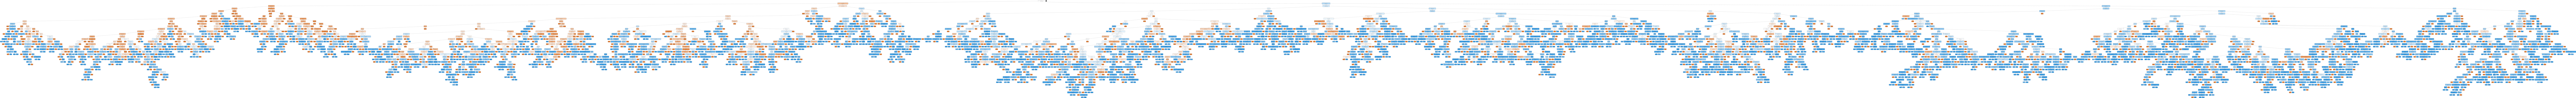

In [382]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_entropy, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [383]:
# Tree is comples. Reducing max depth to see how the tree looks like.

clf_entropy_2 = DecisionTreeClassifier(criterion='entropy',
                                     max_depth=3,
                                     min_samples_leaf=5,
                                     min_samples_split=5,
                                     random_state=100)

clf_entropy_2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       min_samples_split=5, random_state=100)

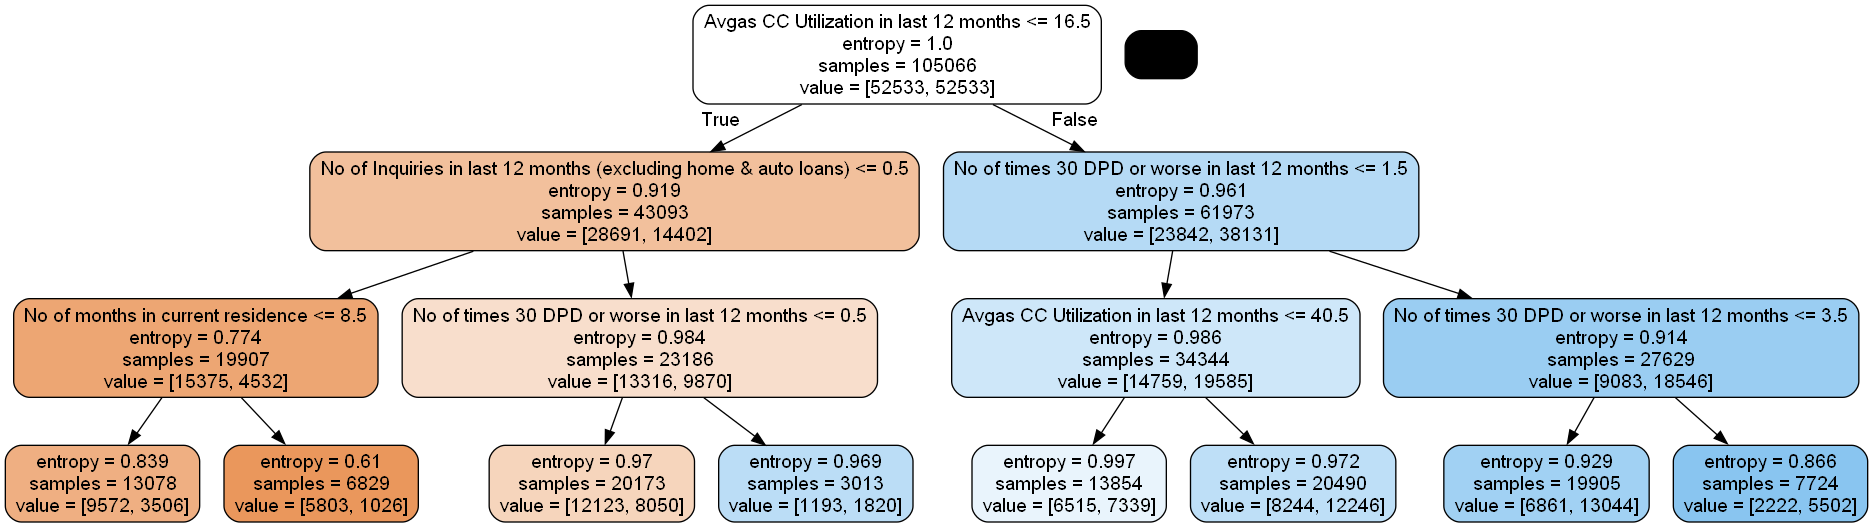

In [384]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(clf_entropy_2, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [385]:
y_pred = clf_entropy.predict(X_test[X_train.columns])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95     13112
         1.0       0.06      0.09      0.07       596

    accuracy                           0.90     13708
   macro avg       0.51      0.51      0.51     13708
weighted avg       0.92      0.90      0.91     13708



In [386]:
print(confusion_matrix(y_test, y_pred))

[[12256   856]
 [  544    52]]
